# Pokedex - Pokemon Recognition

## Importing Libraries

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

import numpy as np
import os
import pathlib

## Preprocessing

### Data-set information

In [3]:
len(os.listdir(str(pathlib.Path.cwd() / 'dataset')))

3

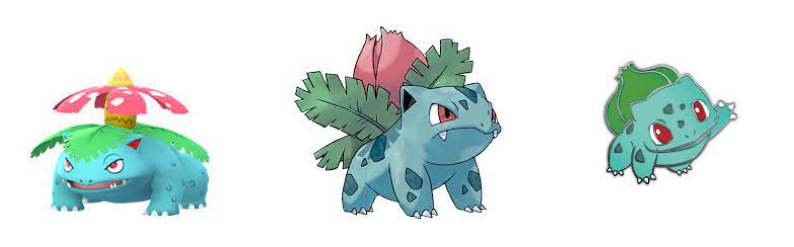

In [59]:

images = []
for i in os.listdir(str(pathlib.Path.cwd() / 'dataset')):
   images.append(str(pathlib.Path.cwd() / 'dataset' / i / np.random.choice(os.listdir(str(pathlib.Path.cwd() / 'dataset' / i)))))

fig = plt.figure(figsize=(10, 7))

for i in range(3):
    fig.add_subplot(1, 3, i+1)
    plt.imshow(plt.imread(images[i]))
    plt.axis('off')




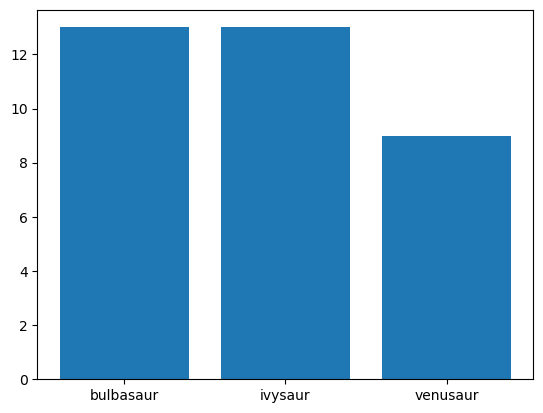

In [10]:
value = [len(os.listdir(str(pathlib.Path.cwd() / 'dataset' / 'bulbasaur'))), len(os.listdir(str(pathlib.Path.cwd() / 'dataset' / 'ivysaur'))), len(os.listdir(str(pathlib.Path.cwd() / 'dataset' / 'venusaur')))]
label = ['bulbasaur', 'ivysaur', 'venusaur']

plt.bar(label, value)
plt.show()


### Create train data

In [11]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    str(pathlib.Path.cwd() / 'dataset'),
    labels='inferred',
    label_mode='categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset='training',
    interpolation='bilinear',
    follow_links=False,
)

Found 35 files belonging to 3 classes.
Using 28 files for training.
Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2023-03-01 16:59:35.168196: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-01 16:59:35.169007: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [12]:
dataset.class_names

['bulbasaur', 'ivysaur', 'venusaur']

In [14]:
validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    str(pathlib.Path.cwd() / 'dataset'),
    labels='inferred',
    label_mode='categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset='validation',
    interpolation='bilinear',
    follow_links=False,
)

Found 35 files belonging to 3 classes.
Using 7 files for validation.


In [17]:
len(dataset.class_names)

3

In [18]:
model = tf.keras.models.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(256, 256, 3)),
    tf.keras.layers.Conv2D(16, len(dataset.class_names), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, len(dataset.class_names), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, len(dataset.class_names), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(dataset.class_names))
])

In [19]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [31]:
history = model.fit(
    dataset,
    validation_data=validation_dataset,
    epochs=30
)

Epoch 1/30
1/1 [==============================] - 0s 384ms/step - loss: 1.9102 - accuracy: 0.2500 - val_loss: 1.4158 - val_accuracy: 0.2857
Epoch 2/30
1/1 [==============================] - 0s 202ms/step - loss: 1.3284 - accuracy: 0.2500 - val_loss: 1.1111 - val_accuracy: 0.4286
Epoch 3/30
1/1 [==============================] - 0s 185ms/step - loss: 1.0173 - accuracy: 0.4643 - val_loss: 1.0590 - val_accuracy: 0.5714
Epoch 4/30
1/1 [==============================] - 0s 196ms/step - loss: 0.8715 - accuracy: 0.7500 - val_loss: 1.3891 - val_accuracy: 0.2857
Epoch 5/30
1/1 [==============================] - 0s 185ms/step - loss: 1.0938 - accuracy: 0.3929 - val_loss: 1.0724 - val_accuracy: 0.2857
Epoch 6/30
1/1 [==============================] - 0s 179ms/step - loss: 0.8478 - accuracy: 0.5357 - val_loss: 0.9869 - val_accuracy: 0.4286
Epoch 7/30
1/1 [==============================] - 0s 176ms/step - loss: 0.7943 - accuracy: 0.6786 - val_loss: 0.9806 - val_accuracy: 0.4286
Epoch 8/30
1/1 [====

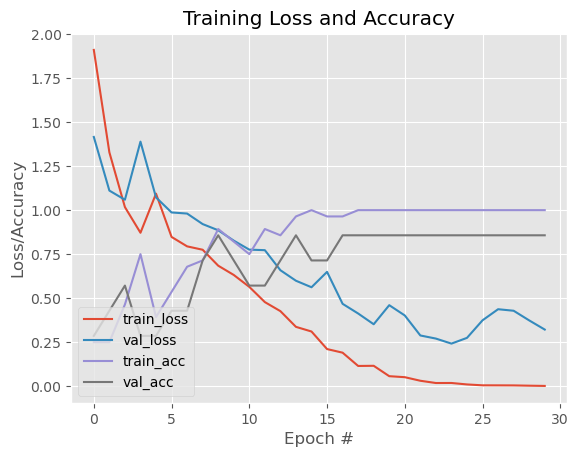

In [44]:
# plot the training loss and accuracy

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, len(history.history["loss"])), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, len(history.history["val_loss"])), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, len(history.history["accuracy"])), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, len(history.history["val_accuracy"])), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("ressources/plot.png")

In [35]:
img = tf.keras.preprocessing.image.load_img(
    str(pathlib.Path.cwd() / 'test.jpeg'),
    color_mode='rgb',
    target_size=(256, 256),
    interpolation='bilinear'
)

In [36]:
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

In [37]:
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
print(score)

2023-03-01 17:36:59.336646: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 402ms/step
tf.Tensor([9.992716e-01 6.975260e-04 3.085025e-05], shape=(3,), dtype=float32)


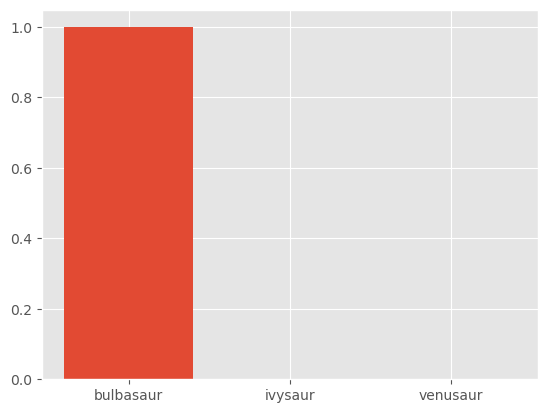

In [39]:
# plot result
plt.bar(dataset.class_names, score)
plt.show()